# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [27]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Q1:
Examine the sample distribution - visually this does approximate to a normal distribution, with seemingly a skew towards the left side of the distribution. The CLT will apply, meaning that the sample distribution of the samplin mean will be normal, with the mean approximating to the population mean and the sampling std. = std(population) / sqrt(130).

Q2:
The sample size is large enough at 130 > 30. It is equally split between male and female at 65 each. 

In [34]:
df[df.gender == 'M'].temperature.count()

65

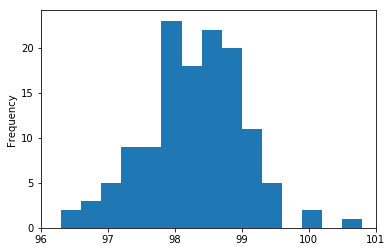

In [48]:
df.temperature.plot(kind='hist', bins = 15)
plt.axis(xmin = 96, xmax=101)
plt.show()

Calculate sampling distribution of the sampling means. Null hypothesis is that population mean temperature is 98.6F

In [14]:
sampling_mean = 98.6  # under null hypothesis
sampling_mean

98.6

In [13]:
sampling_std = df.temperature.std() / float(130.0 ** 0.5)   # stadard deviatio of the sampling distribution of sampl means
sampling_std

0.06430441683789101

In [16]:
diff_means = abs(df.temperature.mean() - sampling_mean)
diff_means

0.35076923076921673

In [17]:
no_stds = diff_means / sampling_std  # number of standard deviations observed result is away from the sample mean under null hyp.
no_stds

5.454823292364079

In [20]:
from scipy.stats import norm

In [26]:
(1 - norm.cdf(no_stds)) * 2 

4.9021570136531523e-08

Q3:
Very small probability of a sample from the sampling mean falling at 5.45 or more standard deviations from the mean either side. hence can reject the null hypothesis that the mean body temperature of the population = 98.6F.
One-sample test is appropriate as the sample is used to test the hypothesis on the mean temperature of entire population.
Z-statistic is appropriate because of the large sample size of 130.


Q4:
Confidence interval of 95% / 99%


In [63]:
z = norm.ppf(0.995)
z

2.5758293035489004

In [64]:
lower_conf = df.temperature.mean() - z * df.temperature.std()
upper_conf = df.temperature.mean() + z * df.temperature.std()
lower_conf, upper_conf

(96.360676105885531, 100.13778543257602)

Q4: At 95% confidence interval, a person's body temperature can be considered 'normal' if it falls within the range from 96.8F and 99.7F, higher or lower than that can be considered 'abnormal'. 

'Abnormal' being a strong term, I would be inclined to use a 99% confidence interval as more appropriate. Recalculating at 99% conf. interval yields a range from 96.4F to 100.1F

Difference between men and women:

In [39]:
male = df[df.gender == 'M'].temperature
male.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [40]:
female = df[df.gender == 'F'].temperature
female.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

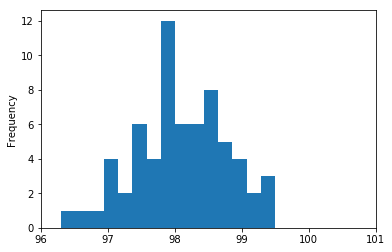

In [46]:
male.plot(kind='hist', bins = 15)
plt.axis(xmin = 96, xmax=101)
plt.show()

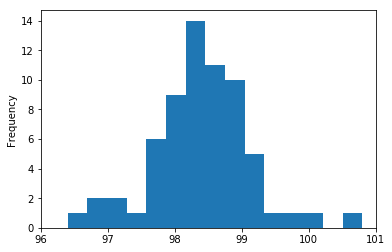

In [47]:
female.plot(kind='hist', bins = 15)
plt.axis(xmin = 96, xmax=101)
plt.show()

Q5: Visually there seems to be a  difference in the male and female distributions and there is a differemnce in means. A two-sample tast can be used to check the significance of the difference in means. Null hypothesis: means of the male and female population are equal

In [50]:
diff_means = abs(male.mean() - female.mean())
diff_means

0.289230769230727

In [52]:
diff_std = ((male.std()**2 / 65) + (female.std()**2 / 65))**0.5
diff_std

0.12655395041982642

In [54]:
std_from_mean = diff_means / diff_std
std_from_mean

2.285434538165274

In [55]:
p_value = (1 - norm.cdf(std_from_mean)) * 2 
p_value

0.022287360760677277

A 2-sided p-value of 2.2% of the difference in means between the male and female sample would indicate that (using a significance threshold of 5%), is statistically significant.